

# Project: Investigate IMDB Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

#### In this project we will investigate the IMDB dataset to find the relationships & to see if the movie industry have been improving throughout the years or was the old era of movies better.

In [24]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [25]:
# Load your data and print out a few lines. Perform operations to inspect data
movies=pd.read_csv('tmdb-movies.csv')
movies.head(5)
#   types and look for instances of missing or possibly errant data.


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06/09/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,04/01/2015,2947,7.3,2015,174799923.1,1.385749e+09



### Data Cleaning (Removing all the unnecessary columns from the dataset !)

In [26]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
movies.drop(['imdb_id','homepage','tagline','keywords','production_companies','cast','overview','budget','revenue'],axis=1, inplace=True)
movies.columns

Index(['id', 'popularity', 'original_title', 'director', 'runtime', 'genres',
       'release_date', 'vote_count', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj'],
      dtype='object')

In [27]:
movies.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [28]:
movies.dtypes

id                  int64
popularity        float64
original_title     object
director           object
runtime             int64
genres             object
release_date       object
vote_count          int64
vote_average      float64
release_year        int64
budget_adj        float64
revenue_adj       float64
dtype: object

In [29]:
movies['release_date']=pd.to_datetime(movies['release_date'])
movies.dtypes

id                         int64
popularity               float64
original_title            object
director                  object
runtime                    int64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
release_year               int64
budget_adj               float64
revenue_adj              float64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis



# Research Question 1 (What are the most successful years for movies? )

## First: The Most Profitable Years for Movies.
## Second: The AVG Voting Count.

In [30]:
movies['release_year'].value_counts()

2014    700
2013    659
2015    629
2012    588
2011    540
2009    533
2008    496
2010    490
2007    438
2006    408
2005    364
2004    307
2003    281
2002    266
2001    242
2000    227
1999    224
1998    210
1996    204
1997    192
1994    184
1993    178
1995    175
1988    145
1989    137
1992    133
1991    133
1990    132
1987    125
1986    121
1985    109
1984    105
1981     82
1982     81
1983     80
1980     78
1978     65
1979     57
1977     57
1971     55
1973     55
1974     47
1976     47
1966     46
1975     44
1964     42
1970     41
1967     40
1972     40
1968     39
1965     35
1963     34
1962     32
1960     32
1969     31
1961     31
Name: release_year, dtype: int64

In [31]:
year_bud=movies.groupby('release_year')['budget_adj'].sum()
year_bud.sort_values(ascending= False)

release_year
2010    9.385001e+09
2011    8.742180e+09
2009    8.735031e+09
2013    8.645240e+09
2004    8.277766e+09
2005    8.199242e+09
2007    8.030088e+09
2006    7.902875e+09
2008    7.880759e+09
2012    7.858264e+09
1999    7.546997e+09
2003    7.396432e+09
2014    7.298716e+09
2000    7.284599e+09
2002    7.145845e+09
2015    6.988821e+09
2001    6.947987e+09
1997    6.454163e+09
1998    6.019175e+09
1996    5.125788e+09
1995    4.100986e+09
1994    3.279412e+09
1993    2.686296e+09
1991    2.347575e+09
1992    2.240538e+09
1990    2.152749e+09
1989    1.899099e+09
1988    1.706241e+09
1984    1.530647e+09
1985    1.517781e+09
1986    1.401604e+09
1987    1.361503e+09
1983    1.136488e+09
1982    9.892602e+08
1980    9.591883e+08
1981    8.963425e+08
1979    7.656024e+08
1970    7.130931e+08
1978    6.986145e+08
1967    6.579397e+08
1977    5.813295e+08
1963    5.221334e+08
1965    4.858590e+08
1976    4.680419e+08
1968    4.509830e+08
1971    4.092587e+08
1962    3.944616e+08


In [32]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
year_rev=movies.groupby('release_year')['revenue_adj'].sum()
year_rev











release_year
1960    1.069117e+09
1961    2.463622e+09
1962    1.553996e+09
1963    1.334357e+09
1964    2.397193e+09
1965    3.170185e+09
1966    5.692623e+08
1967    4.823051e+09
1968    1.659601e+09
1969    1.450145e+09
1970    3.146413e+09
1971    2.180523e+09
1972    2.579801e+09
1973    6.011167e+09
1974    3.593282e+09
1975    3.879578e+09
1976    3.069212e+09
1977    7.845261e+09
1978    4.578763e+09
1979    5.062057e+09
1980    4.679946e+09
1981    4.255844e+09
1982    5.555204e+09
1983    5.051902e+09
1984    5.532077e+09
1985    5.829668e+09
1986    5.973746e+09
1987    6.644058e+09
1988    6.895324e+09
1989    9.085023e+09
1990    8.870474e+09
1991    7.535703e+09
1992    9.445598e+09
1993    1.049859e+10
1994    1.043817e+10
1995    1.310242e+10
1996    1.155478e+10
1997    1.447463e+10
1998    1.269898e+10
1999    1.486523e+10
2000    1.390224e+10
2001    1.651436e+10
2002    1.775189e+10
2003    1.794416e+10
2004    1.938755e+10
2005    1.844209e+10
2006    1.760497e+10


In [33]:
#sorting the series
year_rev.sort_values(ascending= False)

release_year
2015    2.462144e+10
2012    2.342870e+10
2013    2.312342e+10
2011    2.297046e+10
2009    2.254393e+10
2014    2.241120e+10
2010    2.196000e+10
2007    2.041464e+10
2008    1.968016e+10
2004    1.938755e+10
2005    1.844209e+10
2003    1.794416e+10
2002    1.775189e+10
2006    1.760497e+10
2001    1.651436e+10
1999    1.486523e+10
1997    1.447463e+10
2000    1.390224e+10
1995    1.310242e+10
1998    1.269898e+10
1996    1.155478e+10
1993    1.049859e+10
1994    1.043817e+10
1992    9.445598e+09
1989    9.085023e+09
1990    8.870474e+09
1977    7.845261e+09
1991    7.535703e+09
1988    6.895324e+09
1987    6.644058e+09
1973    6.011167e+09
1986    5.973746e+09
1985    5.829668e+09
1982    5.555204e+09
1984    5.532077e+09
1979    5.062057e+09
1983    5.051902e+09
1967    4.823051e+09
1980    4.679946e+09
1978    4.578763e+09
1981    4.255844e+09
1975    3.879578e+09
1974    3.593282e+09
1965    3.170185e+09
1970    3.146413e+09
1976    3.069212e+09
1972    2.579801e+09


In [34]:
#adding top 20 rsults to a new series
top_year_rev=year_rev.nlargest(20)
top_year_rev

release_year
2015    2.462144e+10
2012    2.342870e+10
2013    2.312342e+10
2011    2.297046e+10
2009    2.254393e+10
2014    2.241120e+10
2010    2.196000e+10
2007    2.041464e+10
2008    1.968016e+10
2004    1.938755e+10
2005    1.844209e+10
2003    1.794416e+10
2002    1.775189e+10
2006    1.760497e+10
2001    1.651436e+10
1999    1.486523e+10
1997    1.447463e+10
2000    1.390224e+10
1995    1.310242e+10
1998    1.269898e+10
Name: revenue_adj, dtype: float64

#### In the visualization below:

#### We will visual the relationship between movies & revenue yearly based.

#### This will help to find out what are the most profitable years in movies industry.


Text(0,0.5,'Revenue')

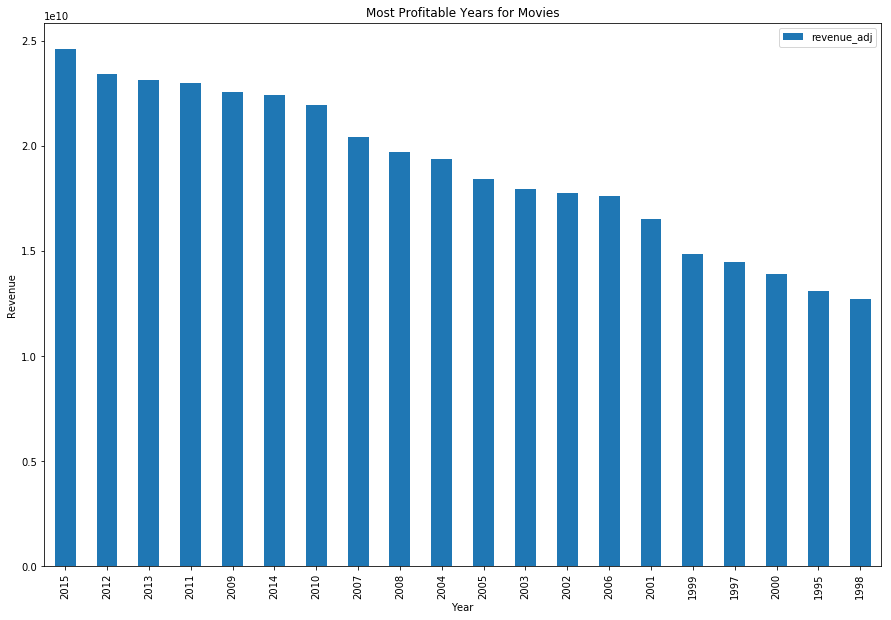

In [35]:
#Visual the results
top_year_rev.plot(x='release_year',y='revenue_adj',kind='bar', figsize=(15,10), title='Most Profitable Years for Movies', legend=True)
plt.xlabel('Year')
plt.ylabel('Revenue')

#### In the visualization above:

##### - Newer movies are more profitable from the late 90s through the 2000s to 2010s either because of more spending on movies' budgets, dollar inflation and/or attracting more audiance.


### Second: The AVG voting for each year

In [36]:
Yvot_avg=movies.groupby('release_year')['vote_average'].mean()
Yvot_avg.sort_values(ascending= False)

release_year
1973    6.703636
1972    6.535000
1971    6.420000
1970    6.417073
1974    6.395745
1975    6.390909
1968    6.379487
1961    6.374194
1962    6.343750
1976    6.340426
1963    6.329412
1960    6.325000
1979    6.308772
1967    6.242500
1982    6.241975
1964    6.211905
1965    6.194286
1985    6.177064
1981    6.165854
1980    6.160256
1977    6.147368
1978    6.130769
1987    6.128800
1966    6.128261
1992    6.081203
1989    6.070073
1995    6.056000
1993    6.050000
1999    6.032589
1991    6.014286
1986    6.004959
1984    6.003810
1990    5.993939
2010    5.990816
2004    5.988599
1997    5.988542
2002    5.973308
1983    5.971250
1998    5.970476
1988    5.965517
2007    5.964384
1969    5.961290
2011    5.958519
1994    5.942391
2006    5.941422
2003    5.930961
2008    5.930847
2014    5.920714
1996    5.900980
2001    5.896281
2015    5.885692
2000    5.882379
2013    5.880577
2005    5.866484
2009    5.856660
2012    5.799830
Name: vote_average, dtype: float64

In [37]:
#adding top 20 rsults to a new series
top_year_vote=Yvot_avg.nlargest(20)
top_year_vote

release_year
1973    6.703636
1972    6.535000
1971    6.420000
1970    6.417073
1974    6.395745
1975    6.390909
1968    6.379487
1961    6.374194
1962    6.343750
1976    6.340426
1963    6.329412
1960    6.325000
1979    6.308772
1967    6.242500
1982    6.241975
1964    6.211905
1965    6.194286
1985    6.177064
1981    6.165854
1980    6.160256
Name: vote_average, dtype: float64

### In the visualization below:

#### - We will visual the relationship between movies & the average rating on a yearly base.

#### - This will help to find out what are the highest rating years in movies industry.

Text(0,0.5,'Voting Average')

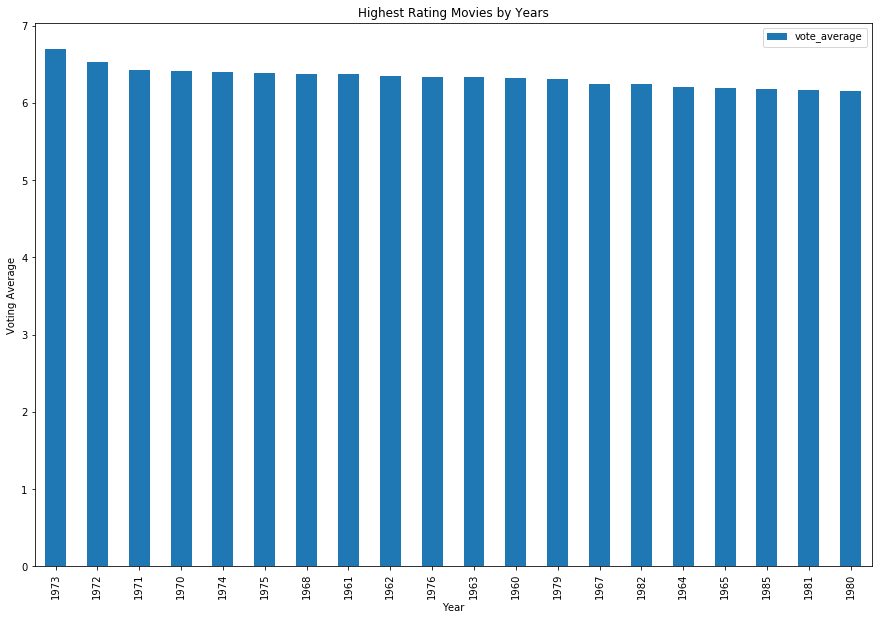

In [22]:
top_year_vote.plot(x='release_year', y='vote_average',kind='bar', figsize=(15,10), title='Highest Rating Movies by Years', legend=True)
plt.xlabel('Year')
plt.ylabel('Voting Average')


#### In the visualization above:

##### - Older movies are dictating this visual espacially the 70s & 60s movies.
#### - The AVG was hovering in 6 out of 10 at best 1973 6.7/10.

### Research Question 2  (What is the relationship between revenue and rating?)

### In Q2 we will see the relationship between revenue & rating

#### The visual below will show either revenue & rating toghterly grow or they decline each other.

Text(0,0.5,'Revenue')

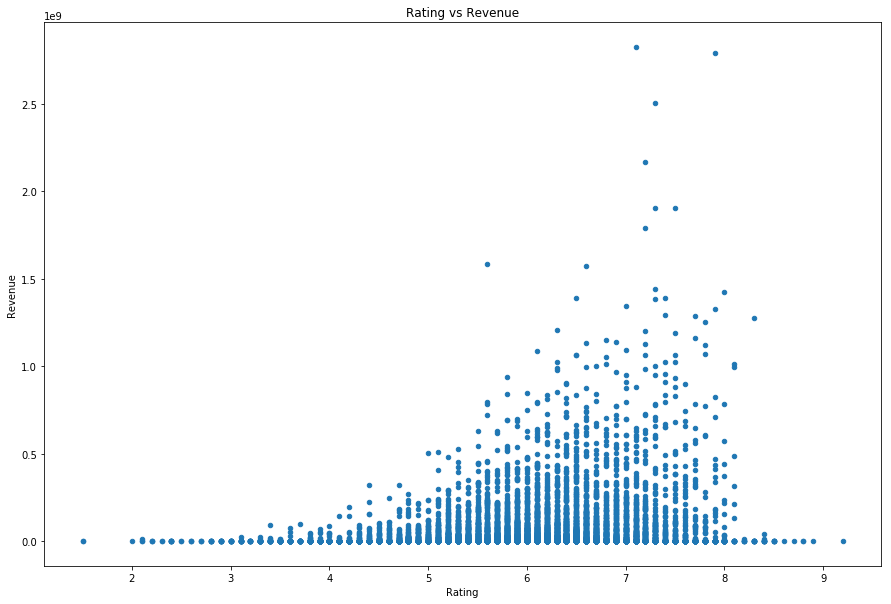

In [30]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
movies.plot(x='vote_average', y='revenue_adj', kind='scatter',figsize=(15,10))
plt.title('Rating vs Revenue')
plt.xlabel('Rating')
plt.ylabel('Revenue')


## From the Visualization above:

### - Higher vote ratings are associated with high revenues.
### - Movies with revenue over 1B dollars are likely to get over 7 out of 10

<a id='conclusions'></a>
## Conclusions

### In Quastion 1, part 1(The most profitable years in movies industry):

#### - New movies clearly are more profitable(the late 90s thoughout the 2000s to the 2010s)
#### - New movies spent more in budgets.
#### - Movie profits grew substaintially in 55 years between (1960 to 2015) from 1 billion dollars to 10 billion dollars.
#### - Aside from the revenue growth for the new movies, also the number of movies produced was expodantially increaing in the latest years of movie industry

### In Quastion 1, part 2(The highest rating years in movie industry):

#### - Old movies got higher rating average espcially the 70s & 60s movies.
#### - The number of movies produced in the 70s & 60s movies was very low comparing to the latest years.
#### - The AVG was hovering in 6 out of 10 at best 1973 6.7/10.
#### - The highest movie year in average ratings was 1973 with only 55 movies produced, and the lowest year in average rating was 2012 with 588 movies produced.

### In Quastion 2 (The relationship between revenue and rating):

#### - Higher vote ratings compliment higher revenues.
#### - Many movies with revenue over 1 billion dollars can get over 7 out of 10.
#### - Many movies with revenue less than 1 billion dollars hovering between 5 & 8 out of 10.

## Limitations

### there were some limitations of this dataset:

#### - Many NAN (null) values.
#### - Many zero values of budget & revenue.
#### - very difficult to manipulate text or string values.


In [31]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0